### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



### Loading Data

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### Data Description

- **Age** - Describes the age of individuals. *Continuous*
- **Workclass** - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- **fnlwgt** - *Continuous*
- **Education** - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- **Education-num** - Number of years spent in education. *Continuous*
- **Marital-status** - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
- **Occupation** - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
- **Relationship** - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
- **Race** - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- **Sex** - Female, Male
- **Capital-gain** - *Continuous*
- **Capital-loss** - *Continuous*
- **Hours-per-week** - *Continuous*
- **Native-country** - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
- **Income** - >50K, <=50K

In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


---

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
for col in df.columns:
    print('------------')
    print(col)
    print(df[col].unique())

------------
age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
------------
workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
------------
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
------------
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
------------
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
------------
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
------------
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Tr

In [7]:
df.replace('?', np.nan, inplace=True)

In [8]:
df.isna().sum() / len(df) * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [9]:
for col in ['workclass','native.country','occupation']:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\WG\AppData\Local\Temp\ipykernel_13408\1590179466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [10]:
df.isna().sum() / len(df) * 100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

### Univariate Analysis

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
categorical_cols = df.select_dtypes(include=['object'])

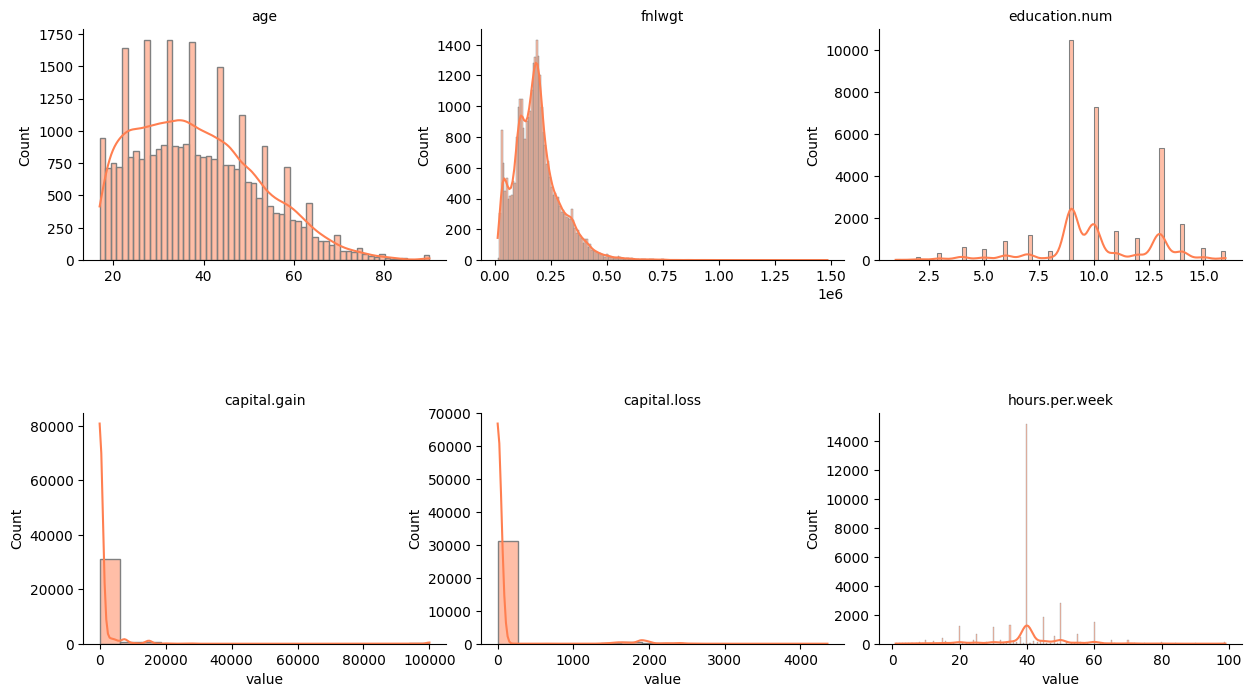

In [12]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="coral", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


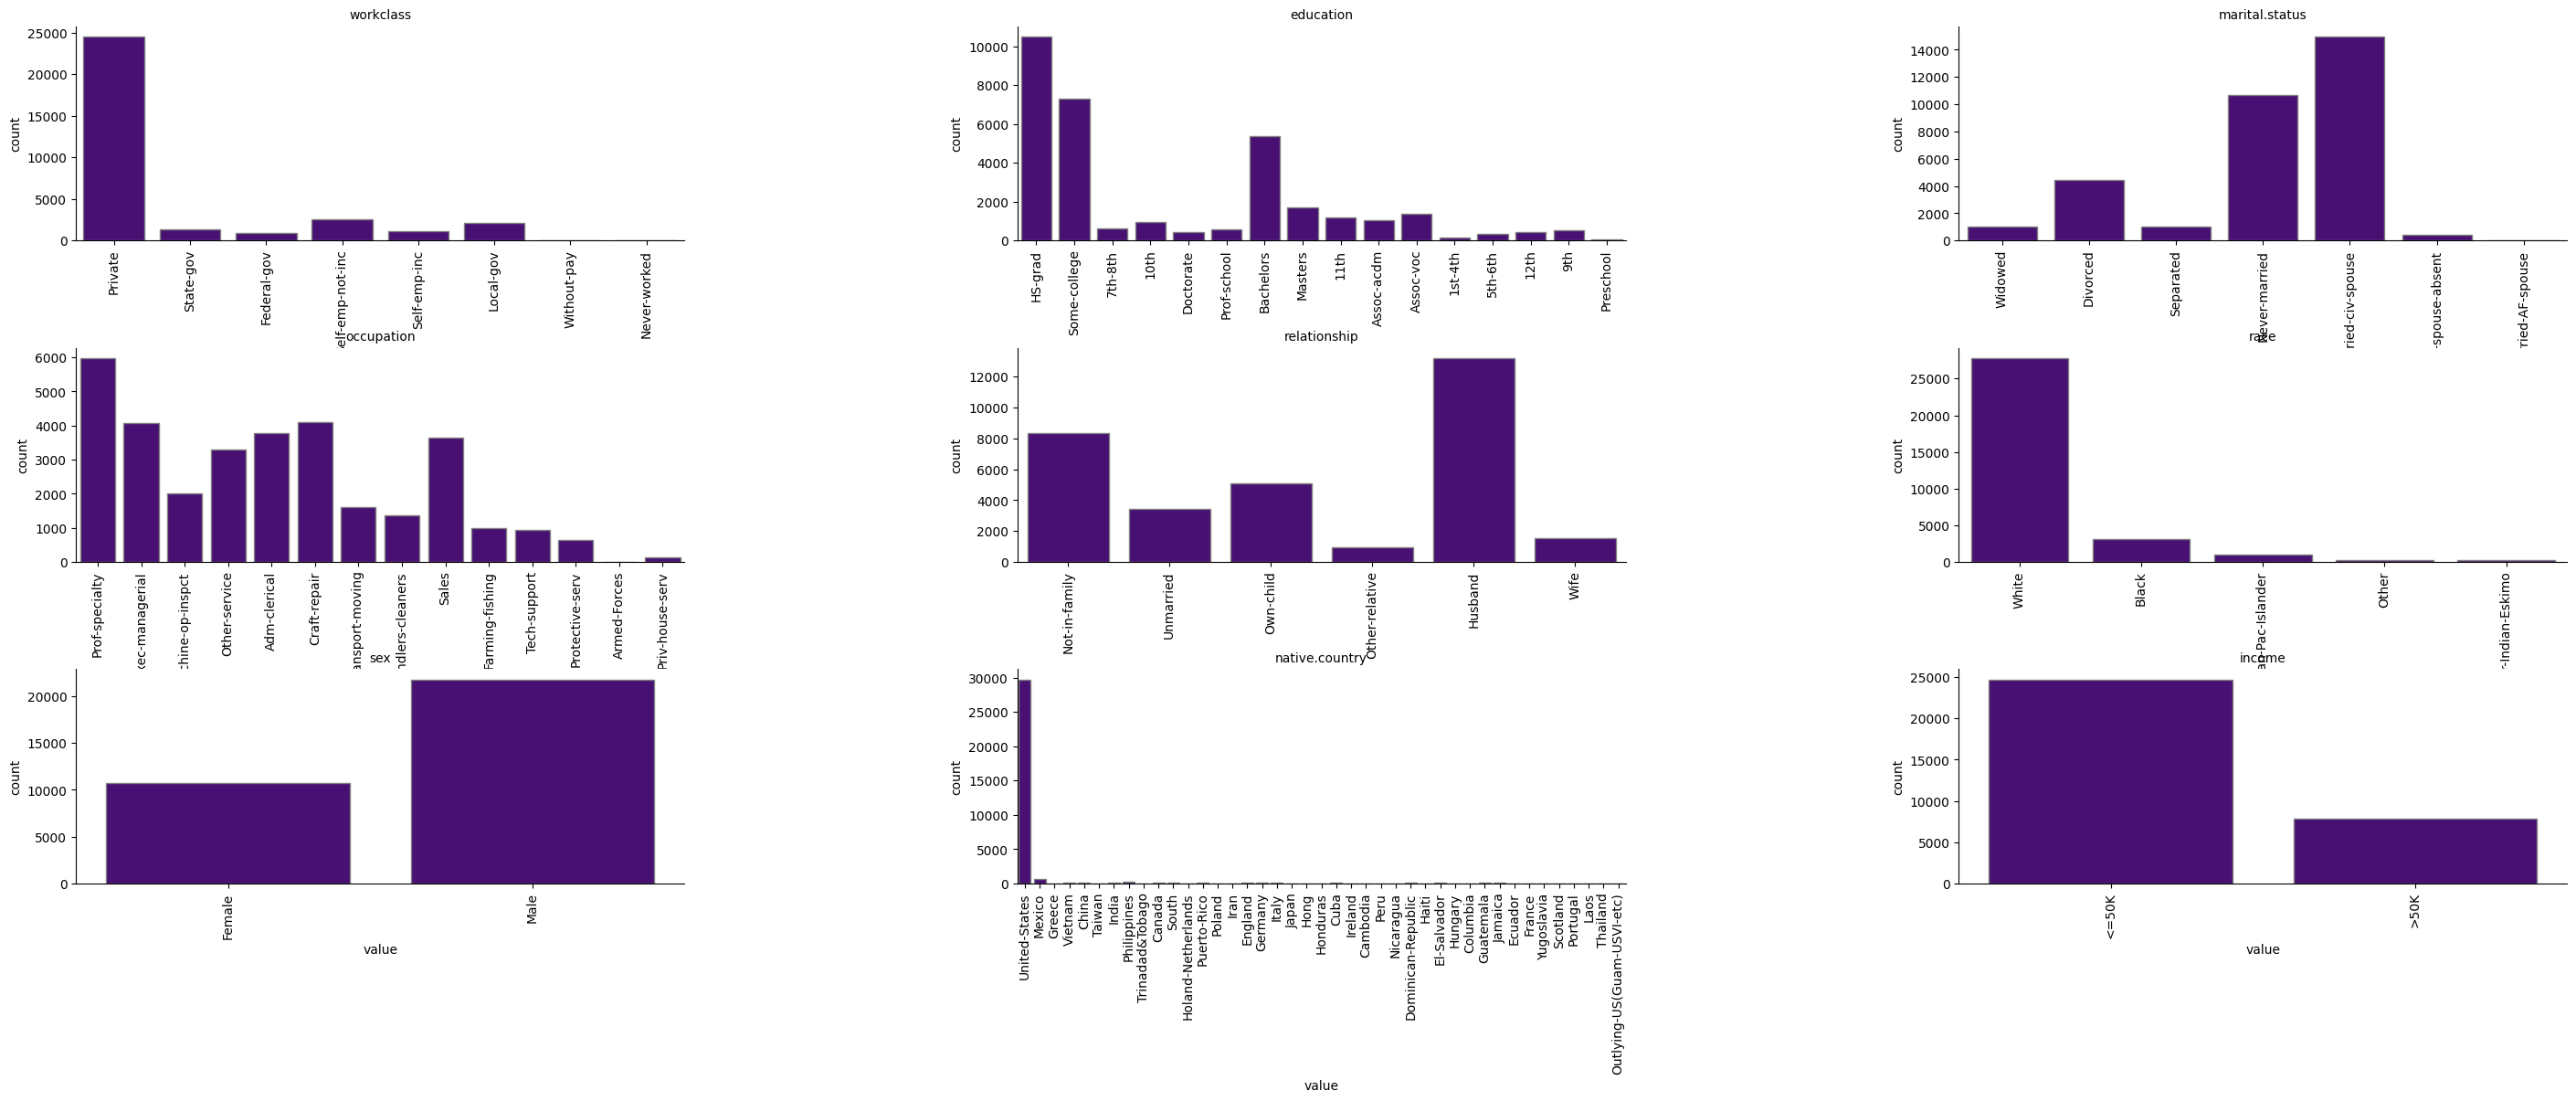

In [13]:
df_melt_cat = categorical_cols.melt()
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=3, height=5, sharex=False, sharey=False)
g.map(sns.countplot, "value", color="indigo", edgecolor="grey")
g.set_titles("{col_name}")
g.figure.set_size_inches(30,10)
g.set_xticklabels(rotation=90)
g.figure.subplots_adjust(hspace=0.5)  # Adjust the space between graphs
plt.show()

### Bivariate Analysis

In [14]:
numerical_cols['income'] = df[['income']]
df_melt_num = numerical_cols.melt(id_vars=['income'])

C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


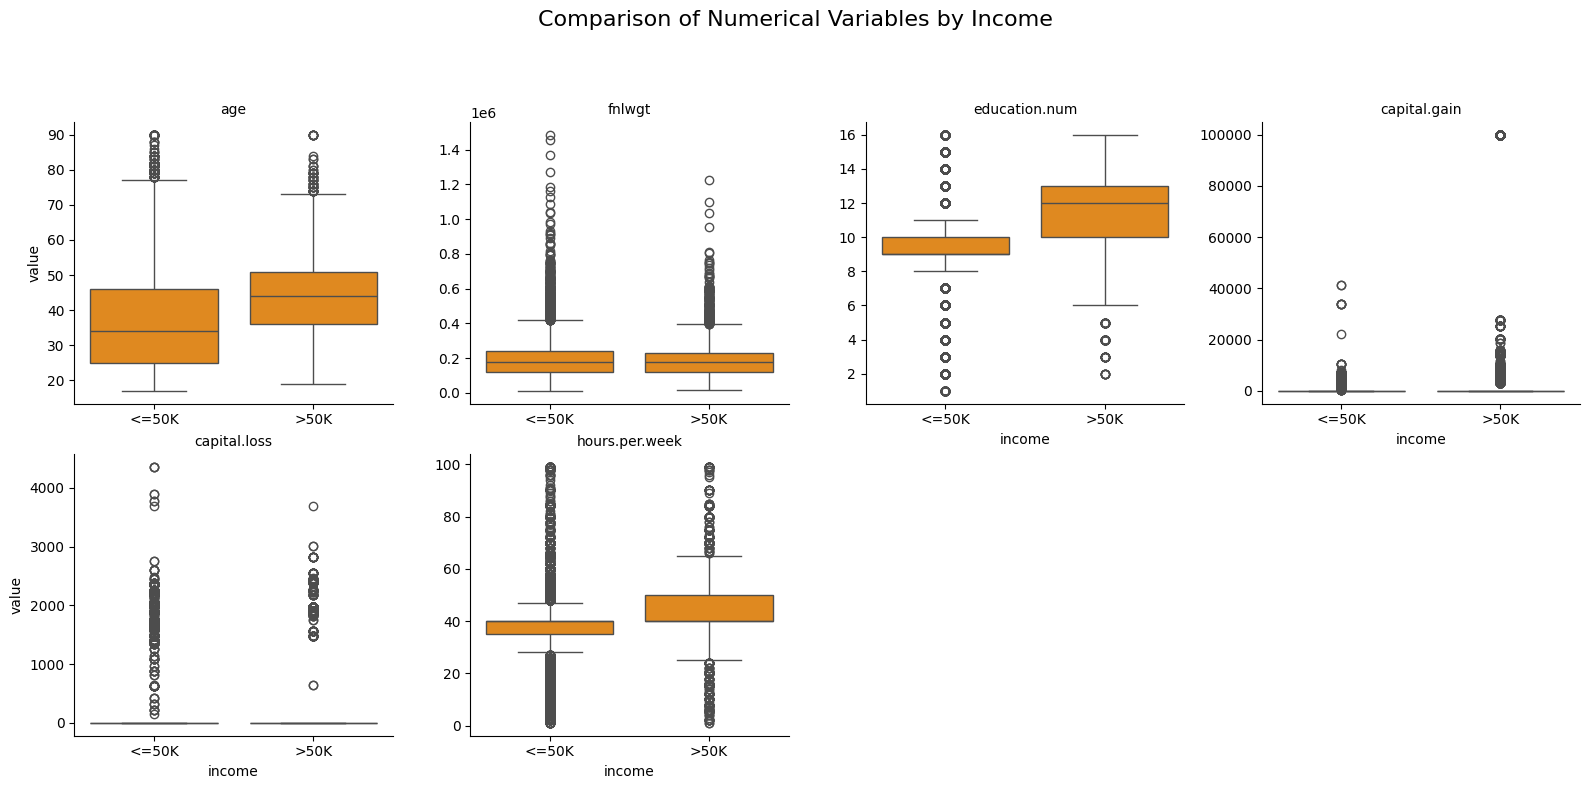

In [15]:
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.boxplot, "income", "value", color="darkorange")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84)
g.figure.suptitle("Comparison of Numerical Variables by Income", fontsize=16)
plt.show()

In [16]:
categorical_cols['income'] = df[['income']]
df_melt_cat = categorical_cols.melt(id_vars=['income'])

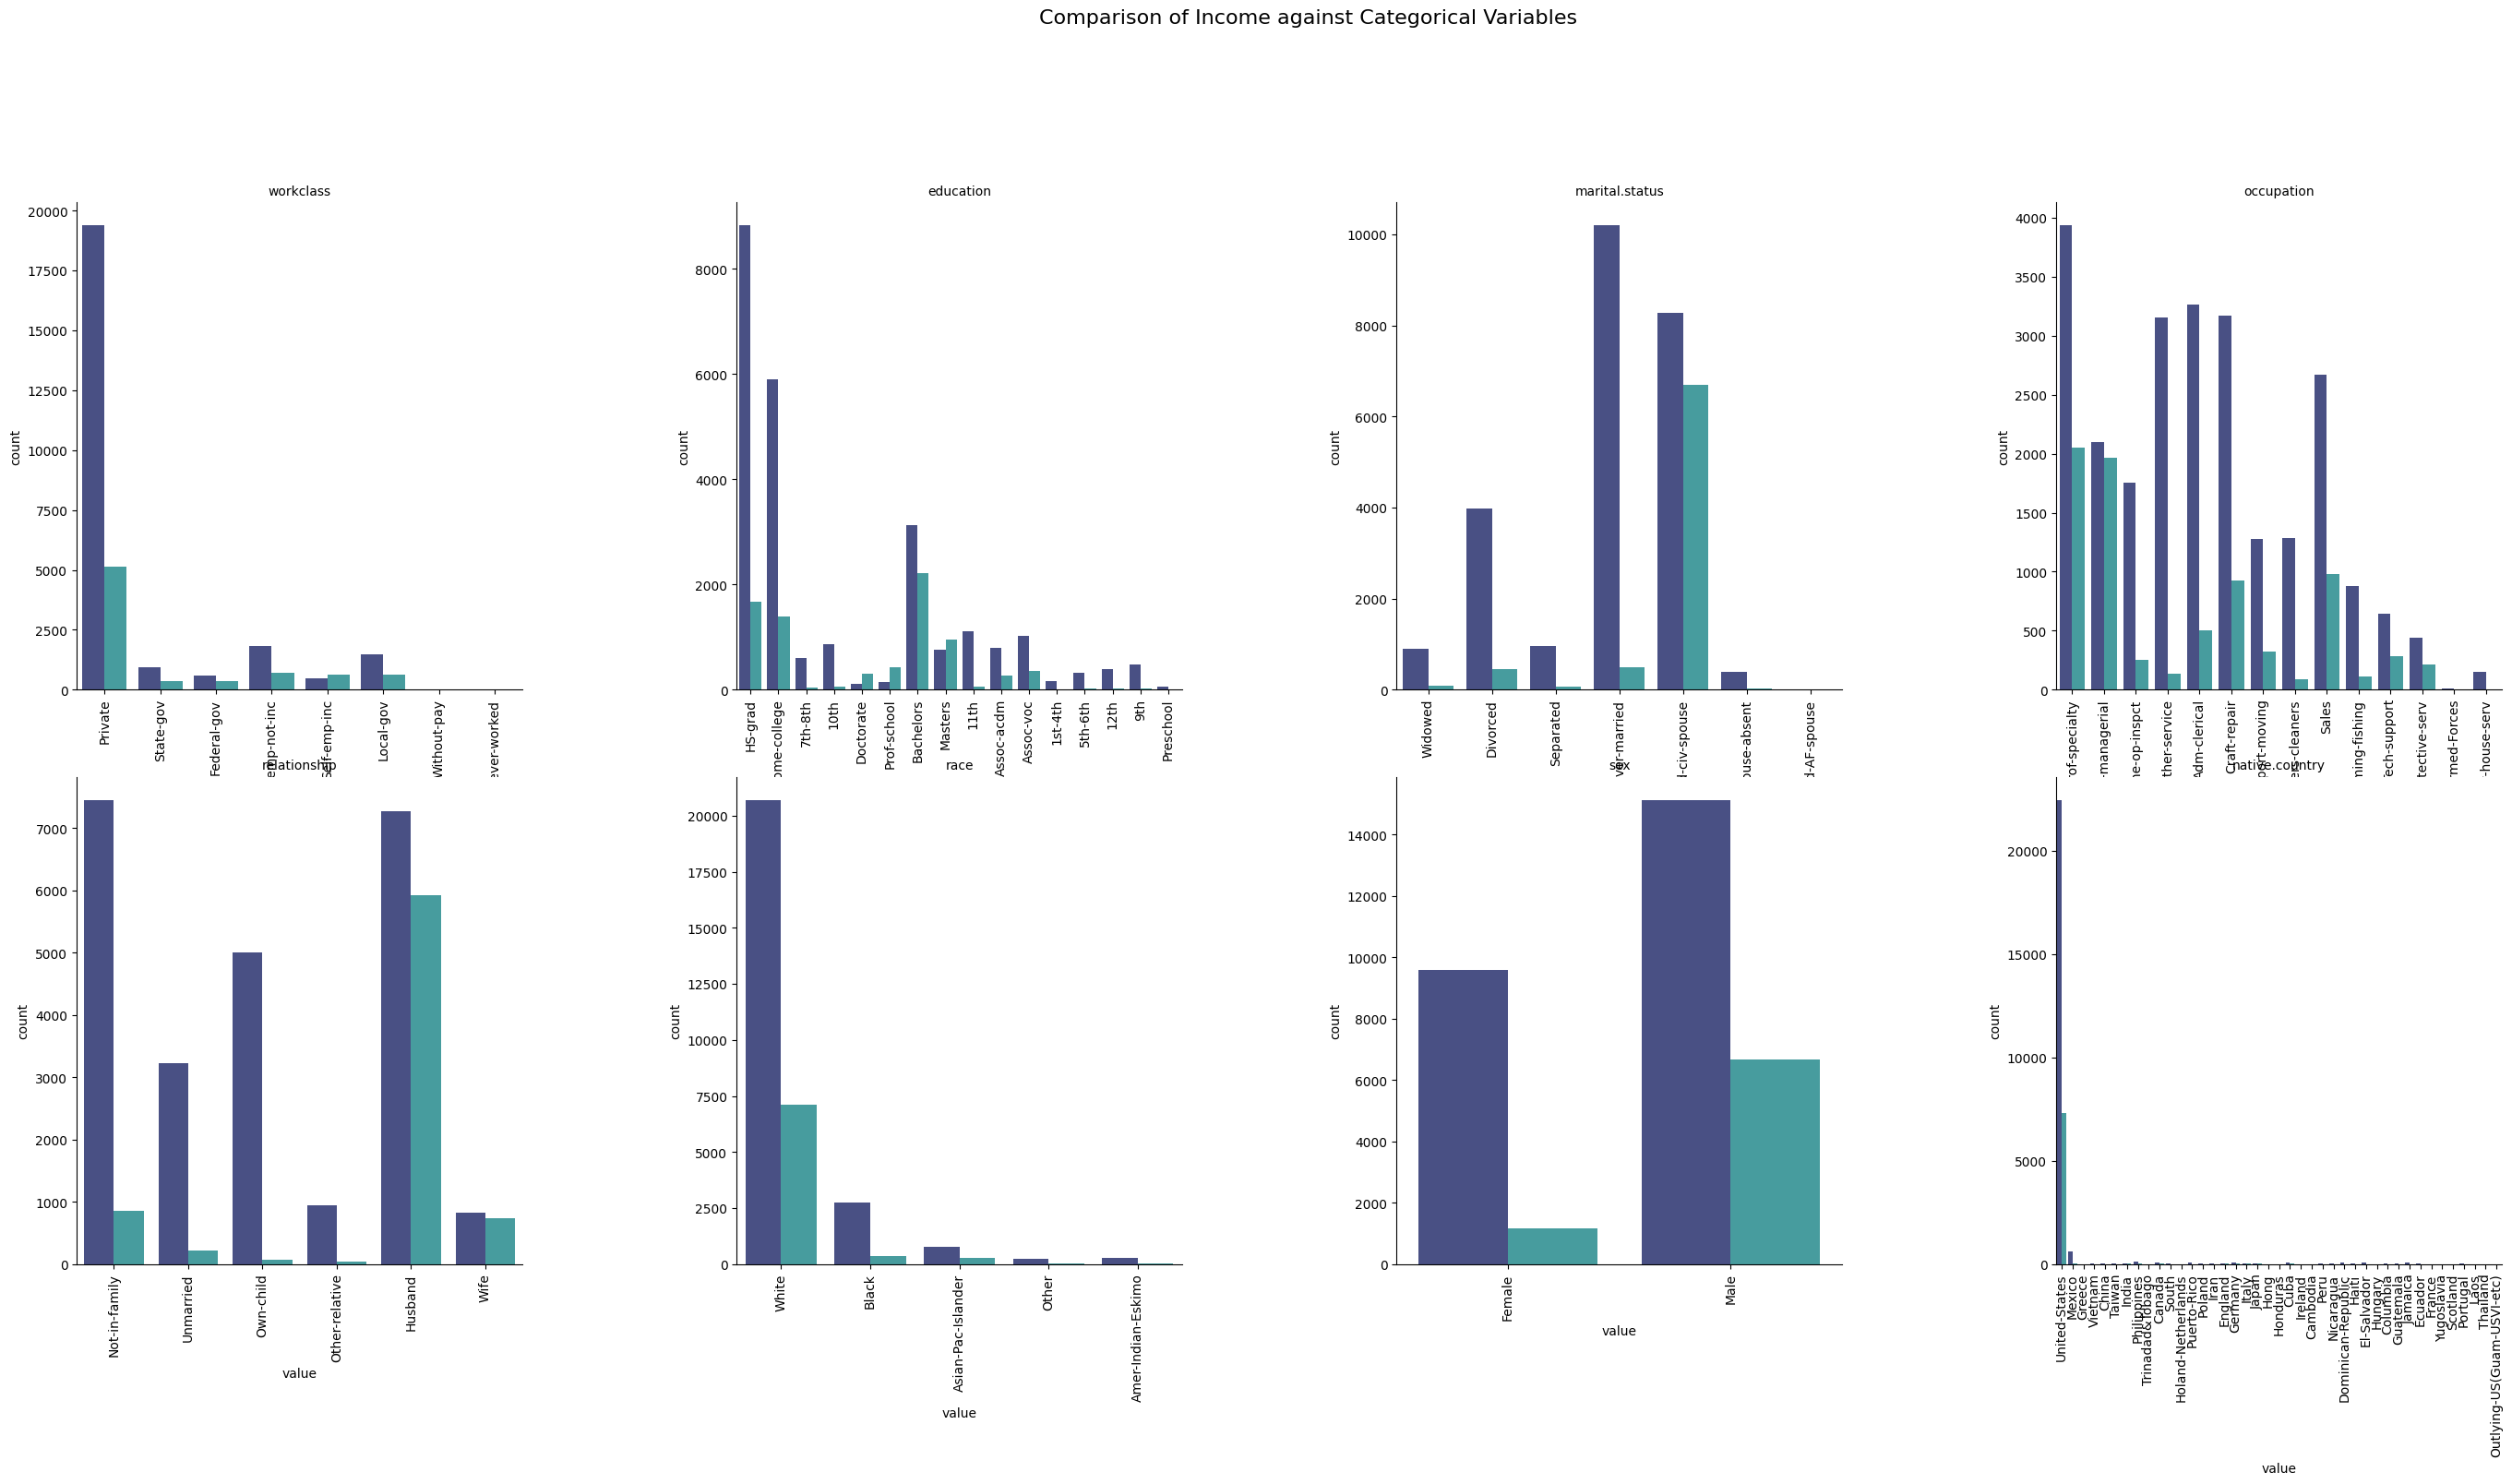

In [17]:
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="value", hue="income",palette='mako')  
g.figure.set_size_inches(30,15)
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84)
g.set_xticklabels(rotation=90)
g.figure.suptitle("Comparison of Income against Categorical Variables", fontsize=16)

plt.show()

### Feature Engineering

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [19]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], labels=['young', 'early_career', 'mid_career', 'senior', 'retirement'])

In [20]:
# Create working hours categories
df['work_intensity'] = pd.cut(df['hours.per.week'], bins=[0, 20, 40, 60, 100], labels=['part_time', 'full_time', 'overtime', 'extreme'])

In [21]:
# Create capital net
df['capital_net'] = df['capital.gain'] - df['capital.loss']
df['capital_net'].fillna(df['capital_net'].mean(), inplace=True)

C:\Users\WG\AppData\Local\Temp\ipykernel_13408\1347105477.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['capital_net'].fillna(df['capital_net'].mean(), inplace=True)


In [22]:
# Create has_capital flag
df['has_capital'] = ((df['capital.gain'] > 0) | (df['capital.loss'] > 0)).astype(int)

In [23]:
# Create marital status simplified
df['is_married'] = df['marital.status'].apply(lambda x: 1 if 'Married' in str(x) else 0)

In [24]:
# Create education level grouping
df['education_level'] = df['education'].map({
    'Preschool': 'basic',
    '1st-4th': 'basic',
    '5th-6th': 'basic',
    '7th-8th': 'basic',
    '9th': 'basic',
    '10th': 'highschool',
    '11th': 'highschool',
    '12th': 'highschool',
    'HS-grad': 'highschool',
    'Some-college': 'undergrad',
    'Assoc-acdm': 'undergrad',
    'Assoc-voc': 'undergrad',
    'Bachelors': 'undergrad',
    'Masters': 'grad',
    'Doctorate': 'postgraduate',
    'Prof-school': 'postgraduate'
})

In [25]:
# Create work sector
df['sector'] = df['workclass'].map({
    'Private': 'Private',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Self-emp-not-inc': 'Self_Employed',
    'Self-emp-inc': 'Self_Employed',
    'Without-pay': 'Other',
    'Never-worked': 'Other'
})

In [26]:
# Create US native flag
df['is_us_native'] = (df['native.country'] == 'United-States').astype(int)

### 5. Data Preprocessing

In [27]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
categorical_cols = df.select_dtypes(include=['object'])

quick overview of categorical:

In [28]:
for col in categorical_cols.columns:
   print('-'*10)
   print(col)
   print(categorical_cols[col].unique())

----------
workclass
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
----------
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
----------
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
----------
occupation
['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
----------
relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
----------
race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
----------
sex
['Female' 'Male']
----------
native.country
['United-States' 'Mexico' 'G

only education is ordinal

#### Process Ordinal Data

In [29]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']
]
encoder = OrdinalEncoder(categories=education_order)
df['education'] = encoder.fit_transform(df[['education']])


education_level_order = [
['basic','highschool','undergrad','grad','postgraduate']
]
encoder = OrdinalEncoder(categories=education_level_order)
df['education_level'] = encoder.fit_transform(df[['education_level']])

age_group_order = [
['young', 'early_career', 'mid_career', 'senior', 'retirement']
]
encoder = OrdinalEncoder(categories=age_group_order)
df['age_group'] = encoder.fit_transform(df[['age_group']])

work_intensity_order = [
['part_time', 'full_time', 'overtime', 'extreme']
]
encoder = OrdinalEncoder(categories=work_intensity_order)
df['work_intensity'] = encoder.fit_transform(df[['work_intensity']])

#### Binary Encoding

In [30]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

#### OneHot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
race_encoded = ohe.fit_transform(df[['race']]).toarray()


race_encoded = pd.DataFrame(race_encoded, columns=ohe.get_feature_names_out(['race']))
race_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, race_encoded], axis=1)
df.drop(columns=['race'],inplace=True)

relationship_encoded = ohe.fit_transform(df[['relationship']]).toarray()
relationship_encoded = pd.DataFrame(relationship_encoded, columns=ohe.get_feature_names_out(['relationship']))
relationship_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, relationship_encoded], axis=1)
df.drop(columns=['relationship'],inplace=True)

sector_encoded = ohe.fit_transform(df[['sector']]).toarray()
sector_encoded = pd.DataFrame(sector_encoded, columns=ohe.get_feature_names_out(['sector']))
sector_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, sector_encoded], axis=1)
df.drop(columns=['sector'],inplace=True)

#### Target Encoding

In [32]:
from sklearn.preprocessing import TargetEncoder
target_cols = ['native.country','workclass','occupation','marital.status']
encoder = TargetEncoder()
for col in target_cols:
    df[col] = encoder.fit_transform(df[[col]], df['income'])

In [33]:
for col in df.columns:
   print('-'*10)
   print(col)
   print(df[col].unique())

----------
age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
----------
workclass
[0.20900091 0.21120958 0.20999583 0.2534524  0.39973075 0.20982879
 0.28090472 0.21043104 0.55310022 0.55336023 0.29214484 0.38548547
 0.28064574 0.28462931 0.29587386 0.5493497  0.56090279 0.28611356
 0.29210677 0.56744054 0.36307983 0.28082541 0.29210053 0.28328709
 0.38215167 0.4002447  0.2941515  0.29954562 0.27312374 0.26842794
 0.        ]
----------
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
----------
education
[ 8.  9.  3.  5. 14. 15. 12. 13.  6. 10. 11.  1.  2.  7.  4.  0.]
----------
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
----------
marital.status
[0.08540319 0.08043982 0.10288635 0.06382223 0.1074673  0.07071996
 0.04484847 0.04668996 0.100668   0.06071302 0.10435517 0.04539068
 0.0

#### Numerical Variables

In [34]:
for col in numerical_cols.columns:
     print(f'{col} skewness : {df[col].skew():.2f}')

age skewness : 0.56
fnlwgt skewness : 1.45
education.num skewness : -0.31
capital.gain skewness : 11.95
capital.loss skewness : 4.59
hours.per.week skewness : 0.23
capital_net skewness : 11.87
has_capital skewness : 2.20
is_married skewness : 0.11
is_us_native skewness : -2.95


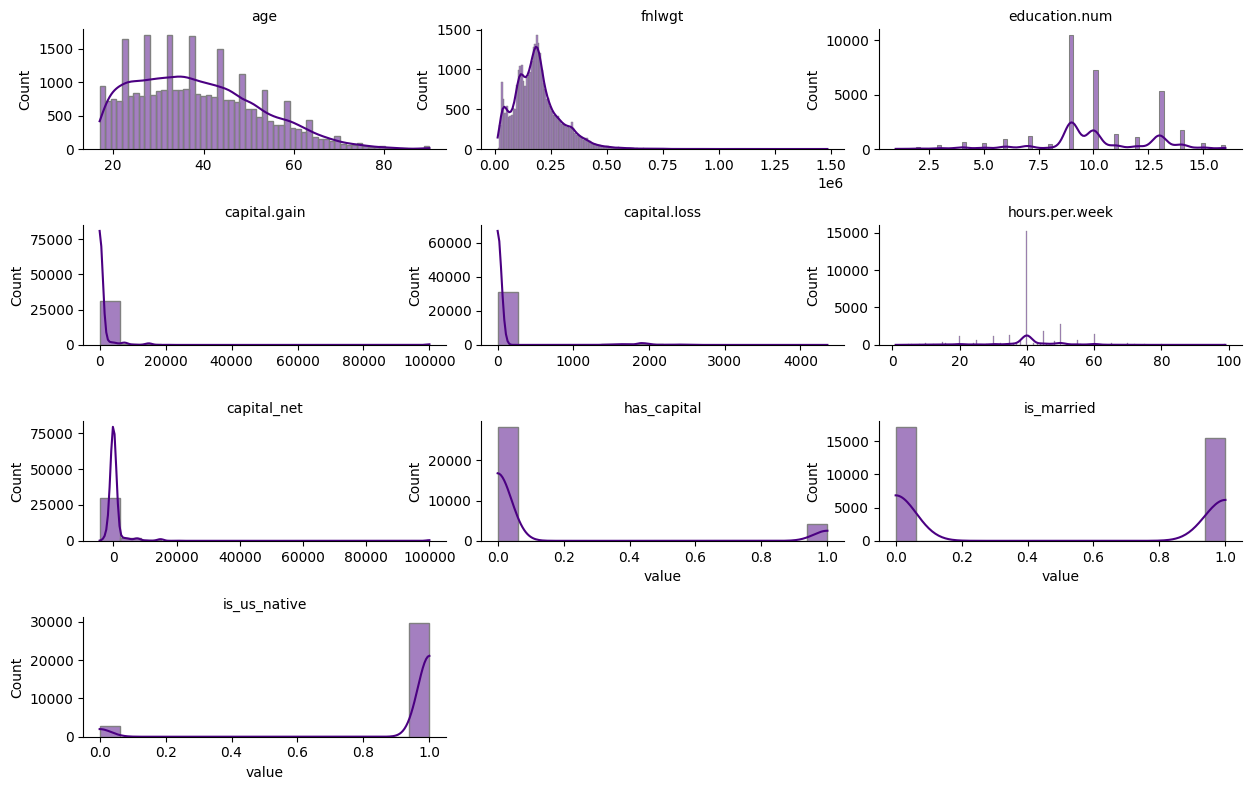

In [35]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="indigo", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

In [36]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

df['fnlwgt'] =  FunctionTransformer(log_transform).fit_transform(df['fnlwgt'])
df['capital.loss'] = FunctionTransformer(log_transform).fit_transform(df['capital.loss'])
df['capital.gain'] = FunctionTransformer(log_transform).fit_transform(df['capital.gain']) 

def shift_and_log(x):
    min_val = x.min()
    shift = 1 if min_val >= 0 else (1 - min_val)
    return np.log(x + shift)

df['capital_net'] = FunctionTransformer(shift_and_log).fit_transform(df['capital_net'])

In [37]:
for col in numerical_cols.columns:
     print(f'{col} skewness : {df[col].skew():.2f}')

age skewness : 0.56
fnlwgt skewness : -0.84
education.num skewness : -0.31
capital.gain skewness : 3.10
capital.loss skewness : 4.31
hours.per.week skewness : 0.23
capital_net skewness : 2.90
has_capital skewness : 2.20
is_married skewness : 0.11
is_us_native skewness : -2.95


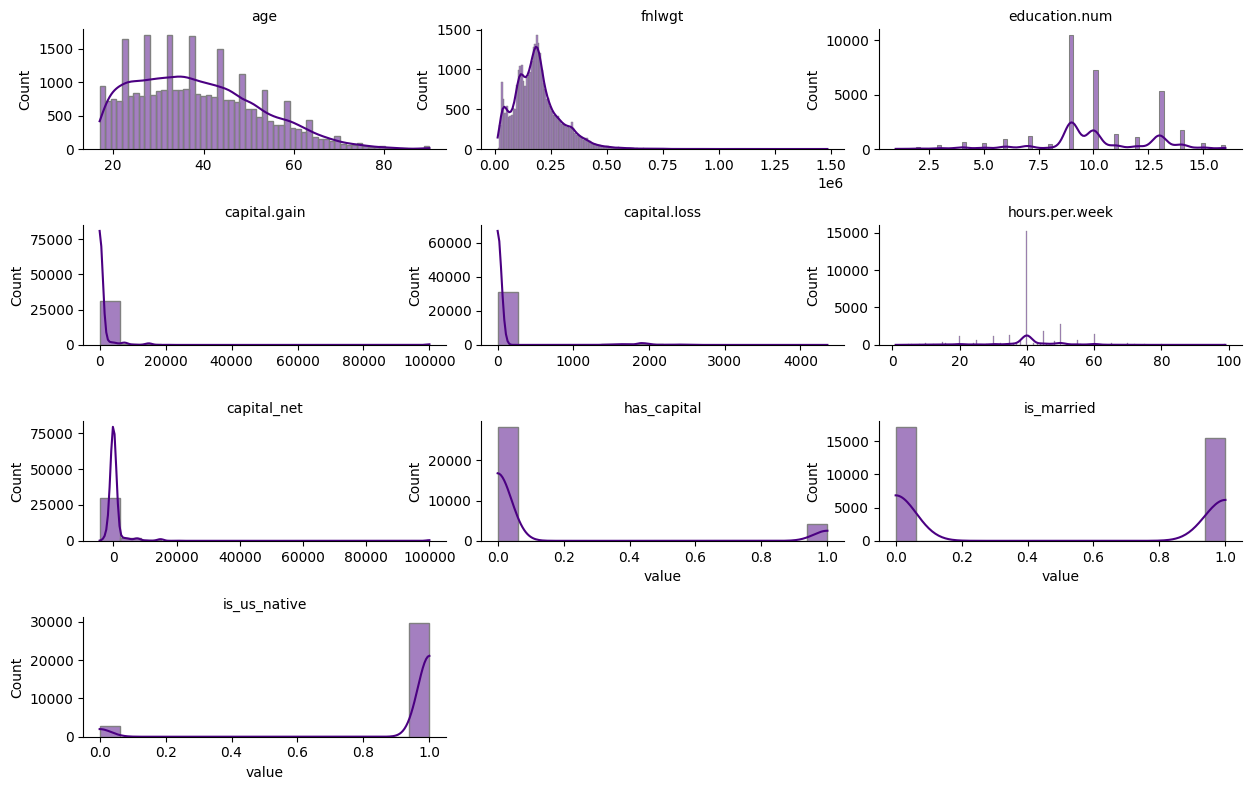

In [38]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="indigo", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

#### Feature Selection

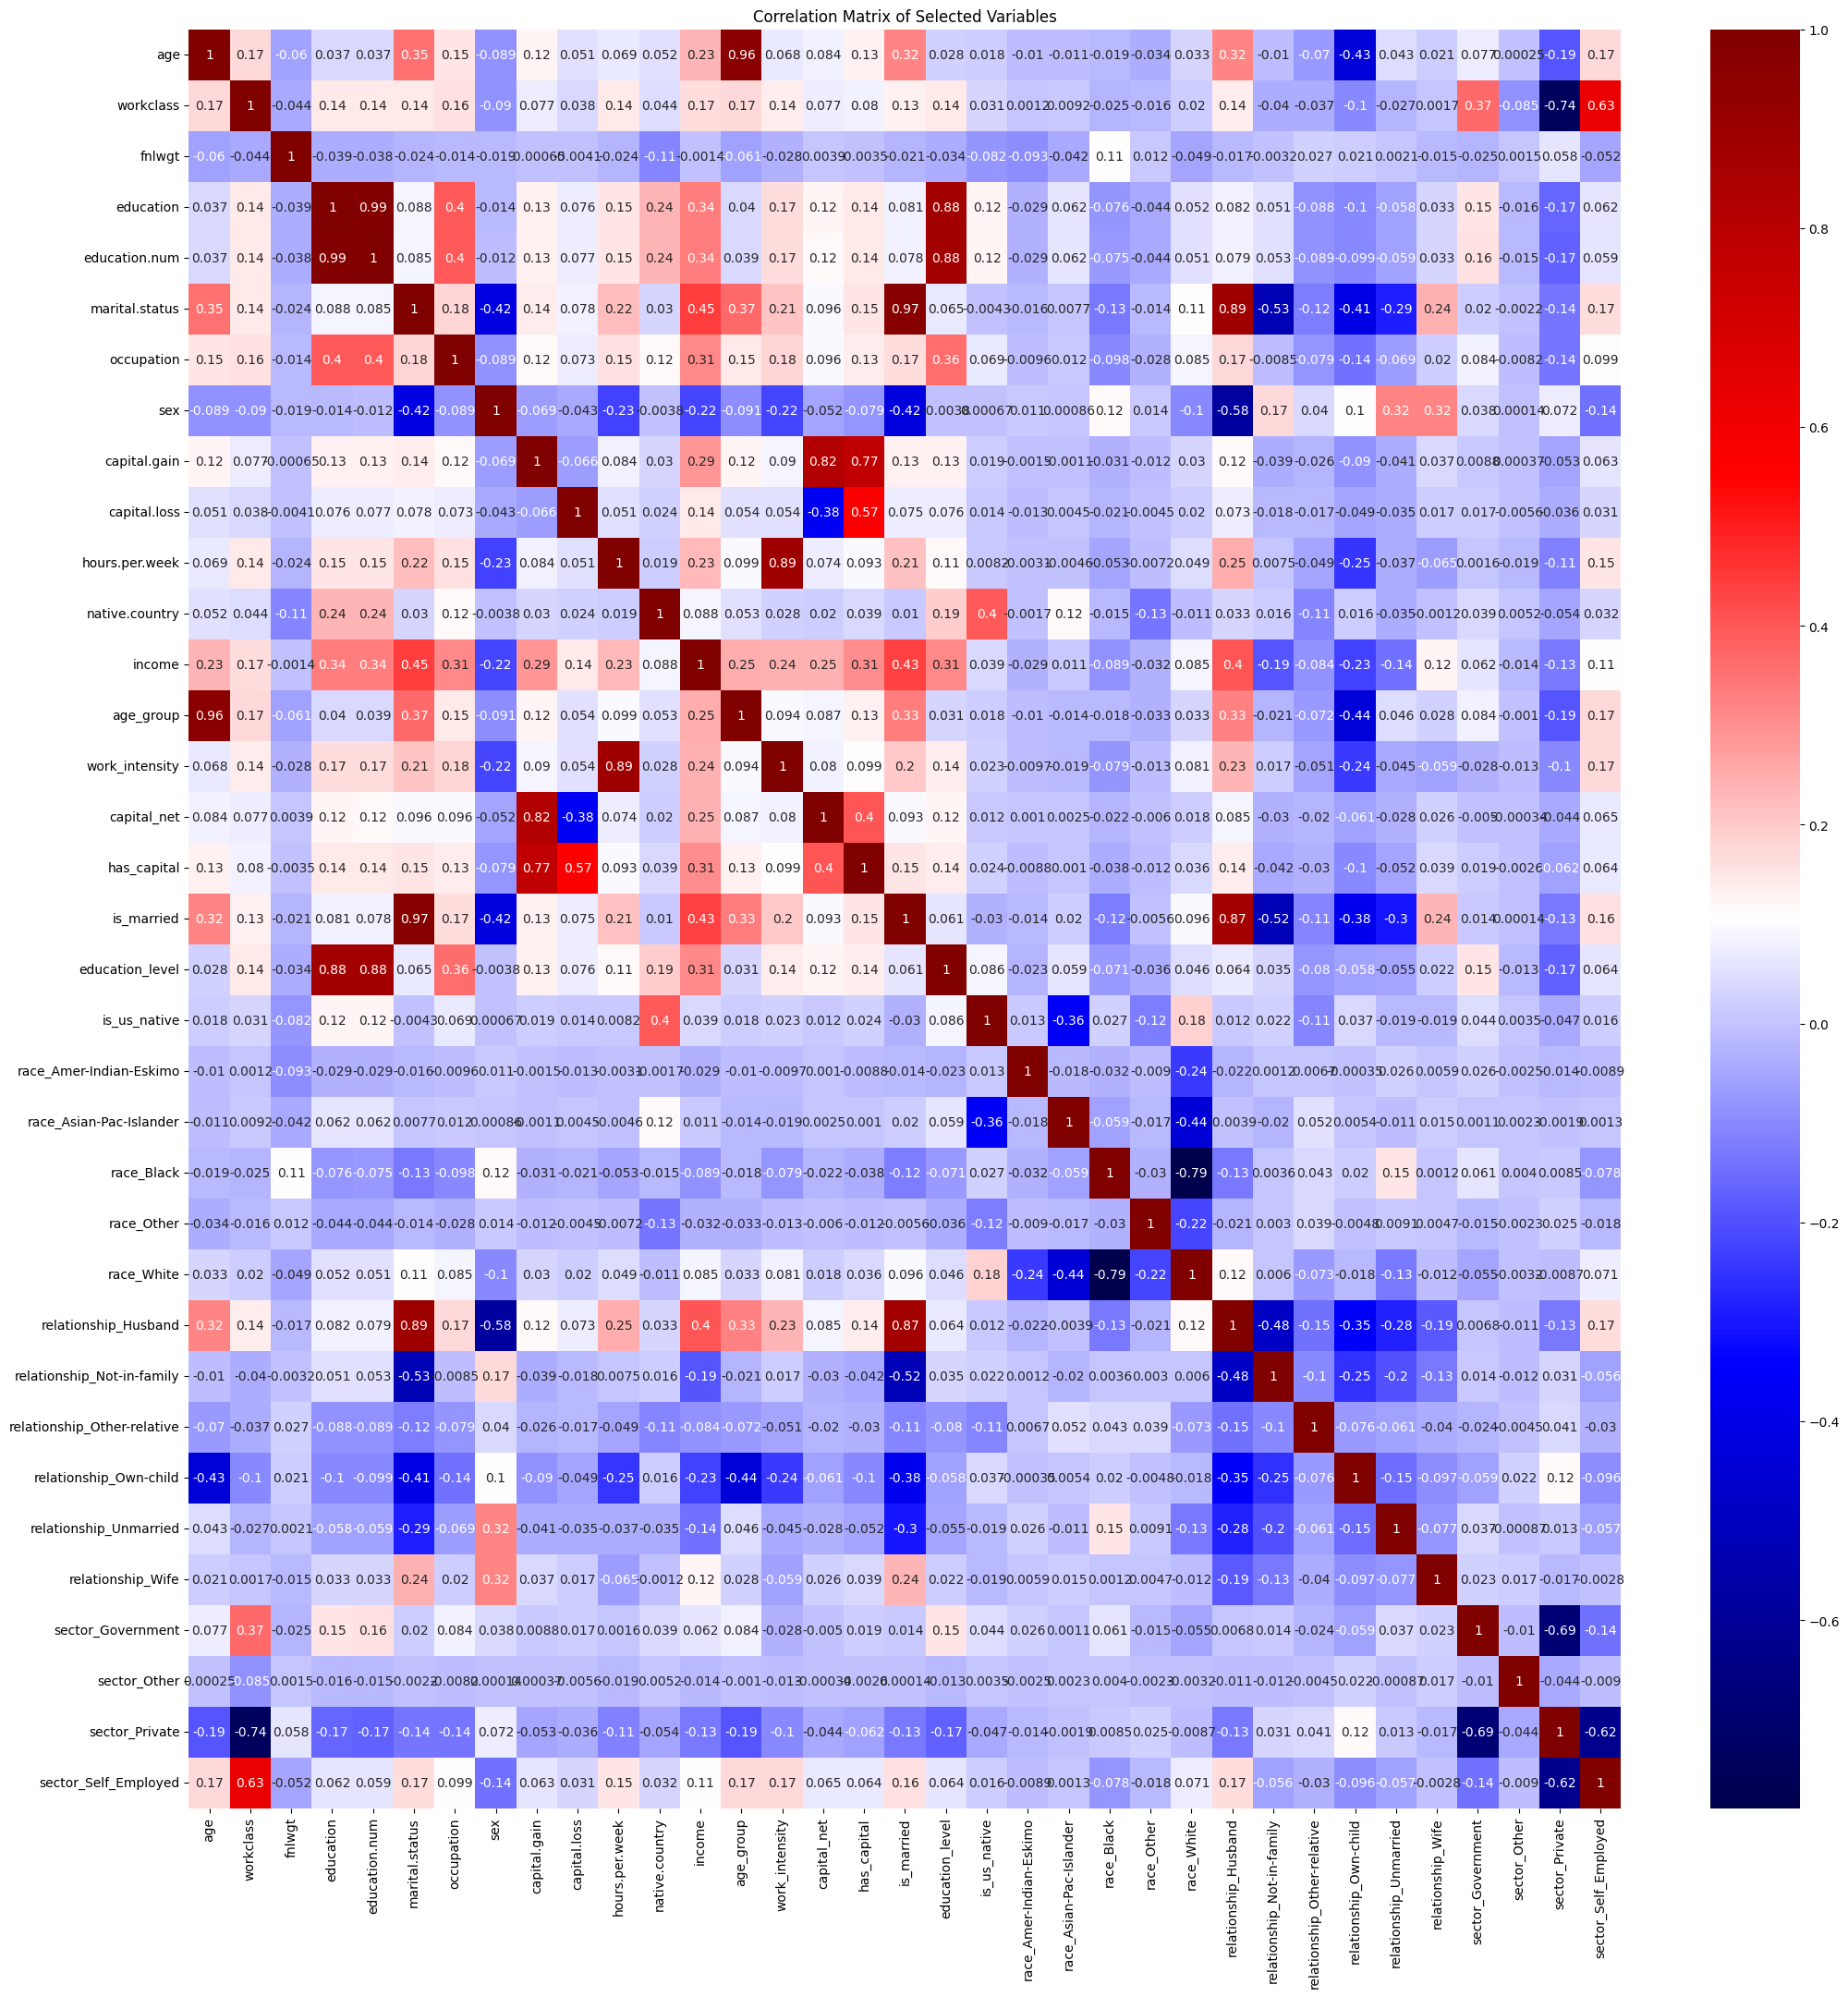

In [39]:
plt.figure(figsize=(25,25))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

Text(0.5, 1.0, 'Correlation to Income')

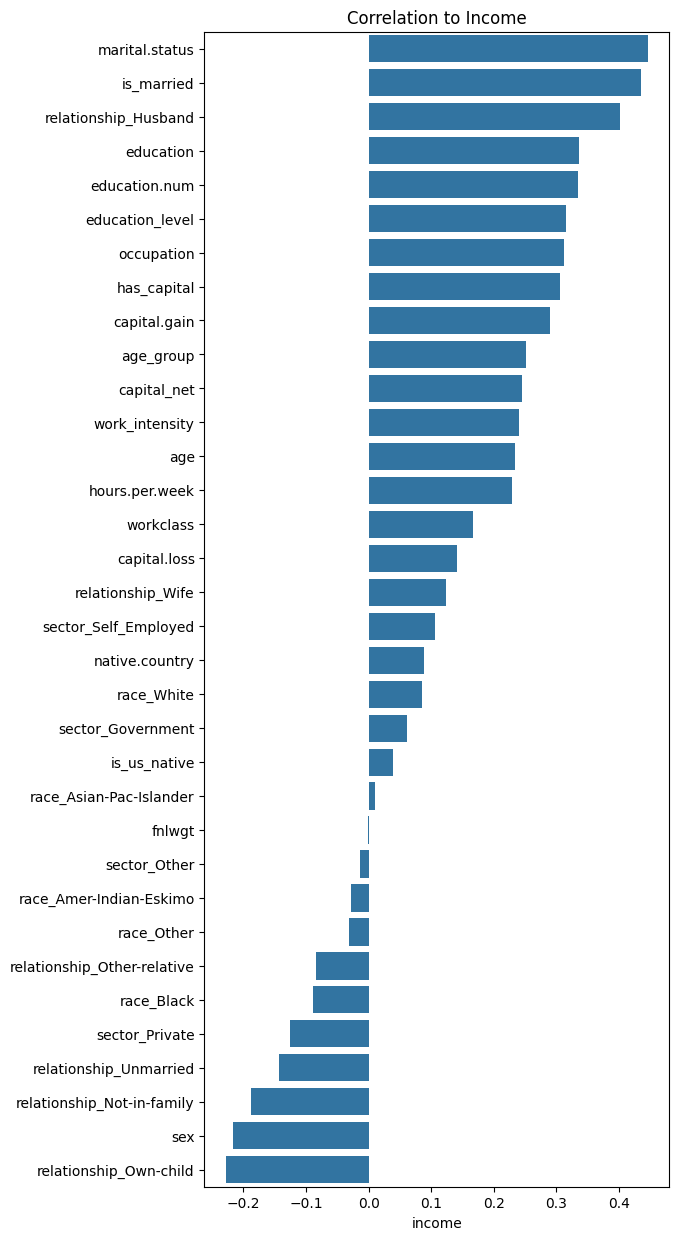

In [40]:
plt.figure(figsize=(6,15))
sns.barplot(df.corr()['income'].drop('income').sort_values(ascending=False),orient = 'h')
plt.title('Correlation to Income')

In [41]:
col_to_drop = []
corr_values = df.corr()['income']

for col, v in corr_values.items():
    if -0.1 < v < 0.1:
        print(col)
        col_to_drop.append(col)

fnlwgt
native.country
is_us_native
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
relationship_Other-relative
sector_Government
sector_Other


In [42]:
df.drop(columns=col_to_drop,inplace=True)

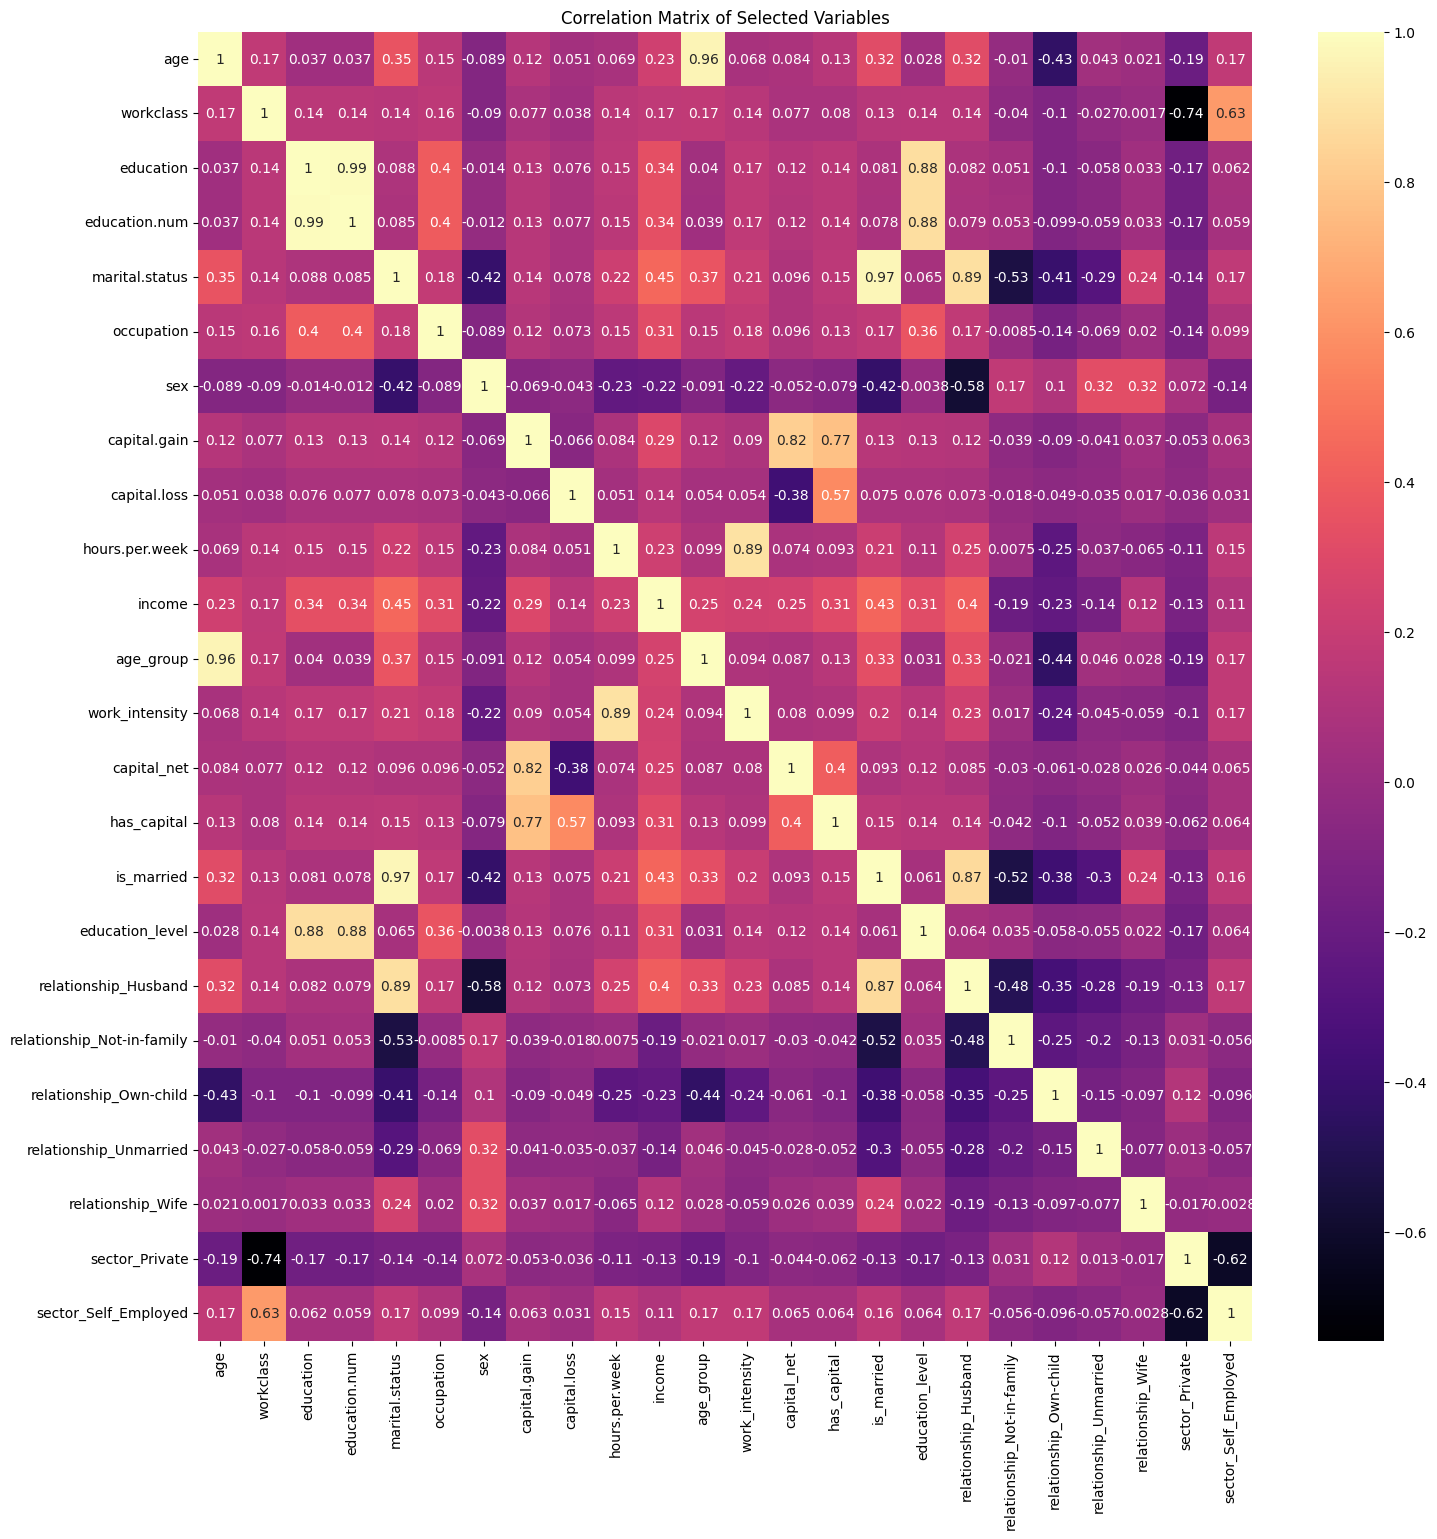

In [43]:
plt.figure(figsize=(17,17))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show()

#### Modelling

In [44]:
X = df.drop('income',axis=1)
X.head(3)

,age,workclass,education,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,...,has_capital,is_married,education_level,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,sector_Private,sector_Self_Employed
0,90,0.209001,8.0,9,0.085403,0.345256,1,0.0,8.379539,40,...,1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,82,0.209001,8.0,9,0.080440,0.486508,1,0.0,8.379539,18,...,1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,66,0.211210,9.0,10,0.085403,0.339417,1,0.0,8.379539,40,...,1,0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.2)
print(f'X shape: {X_train.shape},{X_test.shape}')
print(f'y shape: {y_train.shape},{y_test.shape}')

X shape: (26048, 23),(6513, 23)
y shape: (26048,),(6513,)


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [48]:
X_train_scaled = clf_pipe.fit_transform(X_train)
X_test_scaled = clf_pipe.transform(X_test)
X_scaled = clf_pipe.fit_transform(X)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
y_pred_lr = lr.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix of Logistic Regression'}>

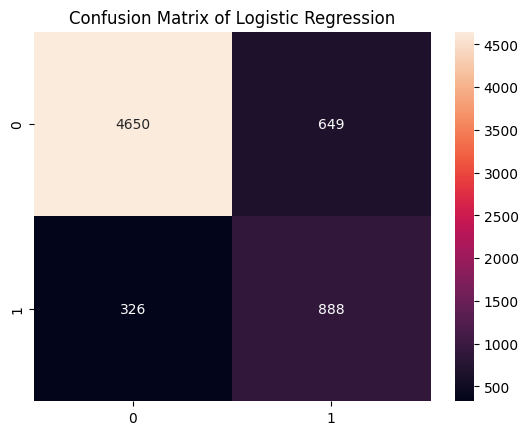

In [51]:
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(confusion_matrix(y_pred_lr,y_test),annot=True,fmt=".0f")

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled,y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix of XGBoost'}>

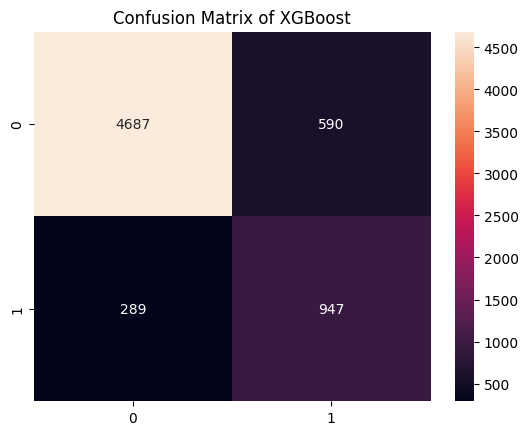

In [53]:
plt.title('Confusion Matrix of XGBoost')
sns.heatmap(confusion_matrix(y_pred_xgb,y_test),annot=True,fmt=".0f",)

In [54]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state=42, verbose=0)
catboost.fit(X_train_scaled,y_train)
y_pred_catboost = catboost.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix of CatBoost'}>

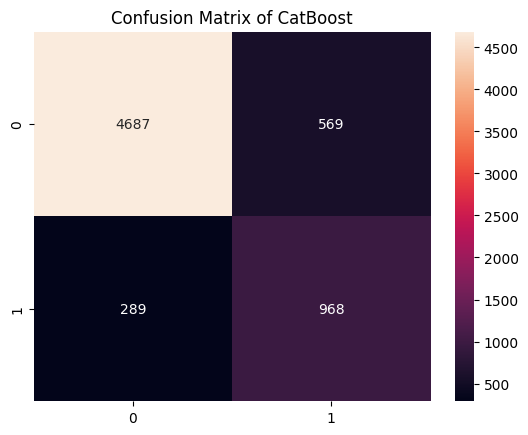

In [55]:
plt.title('Confusion Matrix of CatBoost')
sns.heatmap(confusion_matrix(y_pred_catboost,y_test),annot=True,fmt=".0f",)

In [56]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X_train_scaled,y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)

C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Confusion Matrix of LightGBM'}>

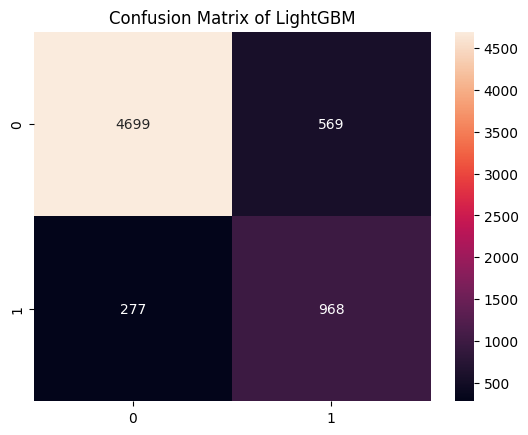

In [57]:
plt.title('Confusion Matrix of LightGBM')
sns.heatmap(confusion_matrix(y_pred_lgbm,y_test),annot=True,fmt=".0f",)

#### Deep Learning Model

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [59]:
X_train.shape

(26048, 23)

In [60]:
model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Input + hidden
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(64, activation='relu')) # Hidden Layer 1
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(32, activation='relu')) # Hidden Layer 2
model_dnn.add(Dense(1, activation='sigmoid'))  # Output layer
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy', #For binary classification
              metrics=['accuracy'])

C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model_dnn.fit(X_train_scaled,y_train,epochs=10, 
                    validation_split=0.25, batch_size=128)

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7767 - loss: 0.4413 - val_accuracy: 0.8514 - val_loss: 0.3212
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8404 - loss: 0.3399 - val_accuracy: 0.8553 - val_loss: 0.3132
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8457 - loss: 0.3340 - val_accuracy: 0.8555 - val_loss: 0.3125
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8452 - loss: 0.3263 - val_accuracy: 0.8586 - val_loss: 0.3084
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8484 - loss: 0.3263 - val_accuracy: 0.8601 - val_loss: 0.3079
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8484 - loss: 0.3193 - val_accuracy: 0.8590 - val_loss: 0.3072
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8534 - loss: 0.3106 - val_accuracy: 0.8561 - val_loss: 0.3091
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8558 - loss: 0.3079 - va

In [62]:
y_pred_dnn = model_dnn.predict(X_test_scaled)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


In [63]:
y_pred_dnn = (y_pred_dnn >= 0.5).astype(int)

<Axes: title={'center': 'Confusion Matrix of Deep Neural Network'}>

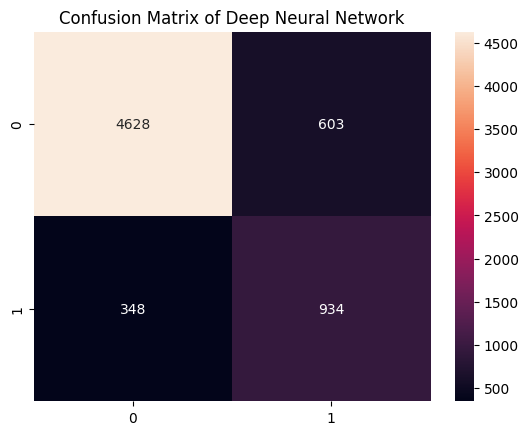

In [64]:
plt.title('Confusion Matrix of Deep Neural Network')
sns.heatmap(confusion_matrix(y_pred_dnn,y_test),annot=True,fmt=".0f",)

#### Evaluation

In [65]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [66]:
def evaluate_scores(X, y, model, verbose=0):
    print('Cross Validation for 4 Folds per Metric')

    accuracy = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="accuracy")
    precision = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="precision")
    recall = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="recall")
    f1 = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="f1")

    return type(model).__name__, np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(f1)

In [67]:
from scikeras.wrappers import KerasClassifier
def build_dnn():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Input + hidden
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu')) # Hidden Layer 1
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu')) # Hidden Layer 2
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam',
              loss='binary_crossentropy') #For binary classification 
    
    return model

model_dnn_cv =  KerasClassifier(build_fn=build_dnn, epochs=20, batch_size=128, verbose=0)

In [68]:
df_metrics = pd.DataFrame(columns=['model','accuracy','precision','recall','f1'])

In [69]:
df_metrics.loc[0] = evaluate_scores(X_scaled,y,lr)
df_metrics.loc[1] = evaluate_scores(X_scaled,y,xgb)
df_metrics.loc[2] = evaluate_scores(X_scaled,y,catboost)
df_metrics.loc[3] = evaluate_scores(X_scaled,y,lgbm)

Cross Validation for 4 Folds per Metric
Cross Validation for 4 Folds per Metric
Cross Validation for 4 Folds per Metric
Cross Validation for 4 Folds per Metric


C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier wa

In [70]:
df_metrics.loc[4] = evaluate_scores(X_scaled,y,model_dnn_cv)
df_metrics.loc[4, 'model'] = 'DNN'

C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross Validation for 4 Folds per Metric


C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\WG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/

In [71]:
df_metrics

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.852308,0.744463,0.589130,0.657612
1,XGBClassifier,0.870059,0.772012,0.653599,0.707768
2,CatBoostClassifier,0.869691,0.774037,0.648300,0.705498
3,LGBMClassifier,0.872332,0.778557,0.656655,0.712330
4,DNN,0.854888,0.741165,0.615064,0.667801


C:\Users\WG\AppData\Local\Temp\ipykernel_13408\3252509713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='accuracy',ascending=False), x='model', y='accuracy', palette='mako')


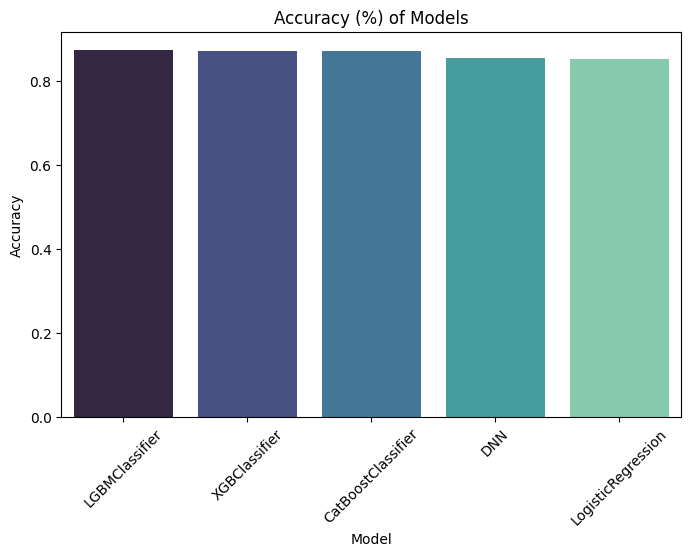

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='accuracy',ascending=False), x='model', y='accuracy', palette='mako')
plt.title('Accuracy (%) of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  
plt.show()

C:\Users\WG\AppData\Local\Temp\ipykernel_13408\48248425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='precision',ascending=False), x='model', y='precision', palette='mako')


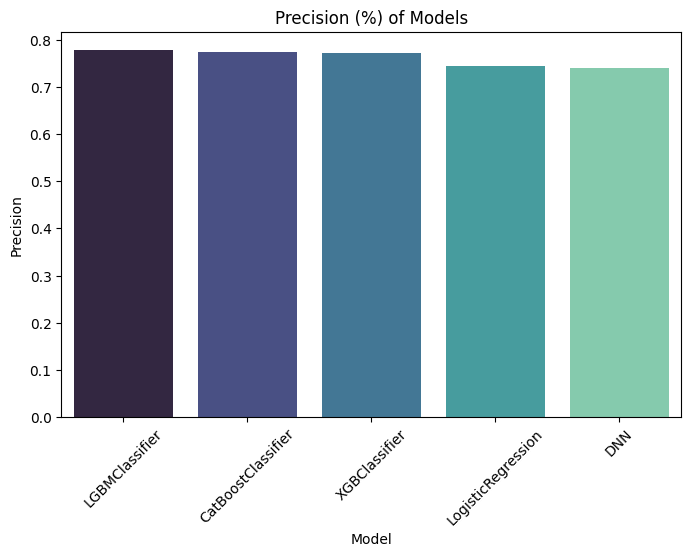

In [73]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='precision',ascending=False), x='model', y='precision', palette='mako')
plt.title('Precision (%) of Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)  
plt.show()

C:\Users\WG\AppData\Local\Temp\ipykernel_13408\3233007273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='recall',ascending=False), x='model', y='recall', palette='mako')


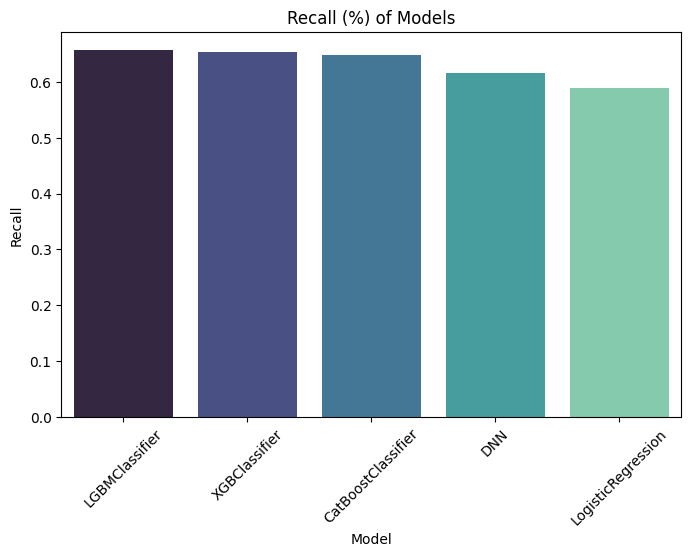

In [74]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='recall',ascending=False), x='model', y='recall', palette='mako')
plt.title('Recall (%) of Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)  
plt.show()

C:\Users\WG\AppData\Local\Temp\ipykernel_13408\1487063672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='f1',ascending=False), x='model', y='f1', palette='mako')


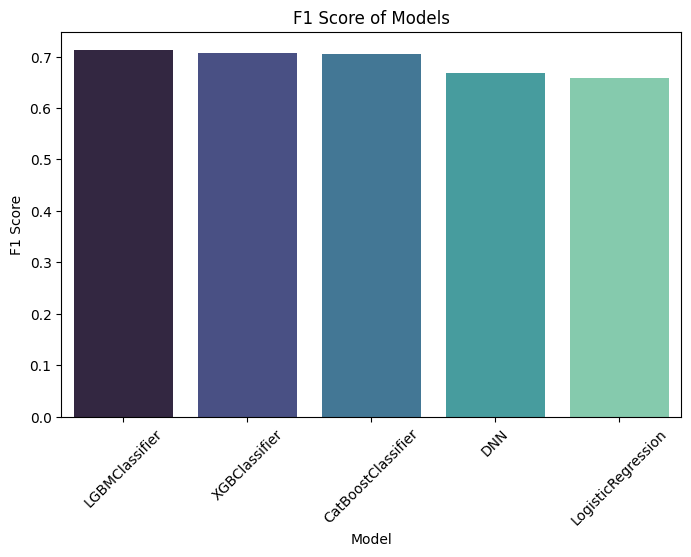

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='f1',ascending=False), x='model', y='f1', palette='mako')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)  
plt.show()